#### IRIS 꽃받침 길이, 너비, 꽃잎 길이기반 너비 예측 모델 + 교차 검증 
- 데이터셋 : iris.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 분석 후 결정
- 피쳐 3개
- 타겟 : 꽃잎 너비
- 검증 : 5개 교차검증 진행



[1] 모듈 로딩 및 데이터 준비

In [19]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split, KFold
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
                                                    ## 교차검증

[2] 데이터분석 -탐색적 분석

In [20]:
## 데이터준비

data_file = '../data/iris.csv'
irishDF = pd.DataFrame(pd.read_csv(data_file, usecols=[0,1,2,3], engine='python'))
irishDF.columns = ['s_length', 's_width', 'p_length', 'p_width']
irishDF.isnull().sum()

s_length    0
s_width     0
p_length    0
p_width     0
dtype: int64

In [21]:

feature = irishDF[['s_length','p_length' ]]
feature1 = irishDF['s_length']
feature2 = irishDF['s_width']
feature3 = irishDF['p_length']
target = irishDF['p_width']


[2] 데이터분석 -탐색적 분석

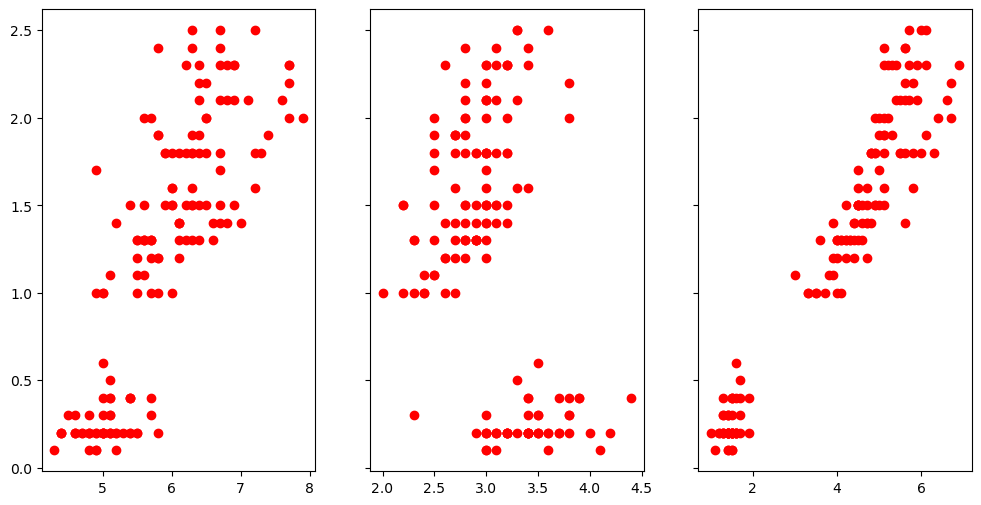

In [22]:
## 무게와 길이의 분포
fig, ax = plt.subplots(1,3, sharey = True,figsize = (12,6))
ax[0].plot(feature1, target,'or')
ax[1].plot(feature2, target,'or')
ax[2].plot(feature3, target,'or')
plt.show()

- 탐색적 데이터 분석 결과
    - 알고리즘 선형회귀 => 규제 선형모델 Ridege, Lasso, ElasticNet
    - 선택 피쳐 : s_lenght, s_width, p_length


[3] 데이터셋 준비
- 학습용 데이터셋 : 학습에만 사용되는 데이터셋 => 해당 데이터셋에서 피쳐와 타겟의 규칙/패턴 찾기
- 검증용 데이터셋 : 학습 중 규칙/패턴 제대로 학습 여부 검사용
- 테스트용 데이터셋 : 모델 완성 후 테스트용 데이터셋
- scikit-learn 패키지 특성으로 학습용과 테스트용만 사용

In [23]:
## 3-1 피처와 타겟 분리
featureDF = irishDF[irishDF.columns[:-1]] # 3개 feature
targetSR = irishDF[irishDF.columns[-1]]
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [24]:
## 학습용 : 테스트용 = 9:1
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape}, / y_test => {y_test.ndim}D, {y_test.shape}")

X_train => 2D (112, 3) / X_test => 2D, (38, 3)
y_train => 1D (112,), / y_test => 1D, (38,)


### 4 학습진행

In [25]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [26]:
## 교차검증 객체 생성 5개 분할 - default
kf = KFold()

## 선형회귀모델 객체 생성성
lr = Ridge()

# kf.get_n_splits(X_train, y_train)

In [ ]:
## 비교를 위해서, 릿지, 라쏘, 엘라스틴. 모두 해보고 어느 상황에 적합한지.
## 과대적합을 막기 위해 써보는 것.

In [ ]:
resultDF = pd.DataFrame(columns = ['alpha','train_score', 'test_score', 'train_loss', 'test_loss'])

## alpha값에 따른 Ridge 모델 성능 비교
for alpha in [0.1, 0.5, 1.0, 1.5, 2]:
    lr = Ridge(alpha)
    
    train_stotal , test_stotal = 0, 0
    train_ltotal, test_ltotal = 0, 0
    
        
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # print(f"Fold {i}")
    # print(test_index in y_test.index)
        ## 학습용 / 테스트용 피쳐와 타겟 추출
        train_data, train_label = X_train.iloc[train_index, 1:], y_train.iloc[train_index]
        test_data, test_label = X_train.iloc[test_index, 1:], y_train.iloc[test_index]
        # print(train_data.columns)

        #학습
        lr.fit(train_data, train_label)
        
        train_score = lr.score(train_data, train_label)
        test_score = lr.score(test_data, test_label)

        train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
        test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

        train_stotal += train_score
        test_stotal += test_score
        train_ltotal += train_loss
        test_ltotal += test_loss
    #alpha값 별로 성능과 손실값 평균 저장하기    
    resultDF.loc[alpha] = [alpha, train_stotal/5,test_stotal/5,train_ltotal/5,test_ltotal/5]


In [48]:
resultDF

,alpha,train_score,test_score,train_loss,test_loss
0.1,0.1,0.933824,0.929448,0.197103,0.200867
0.5,0.5,0.933817,0.929515,0.197114,0.200787
1.0,1.0,0.933795,0.929580,0.197146,0.200713
1.5,1.5,0.933761,0.929625,0.197198,0.200666
2.0,2.0,0.933716,0.929653,0.197265,0.200643


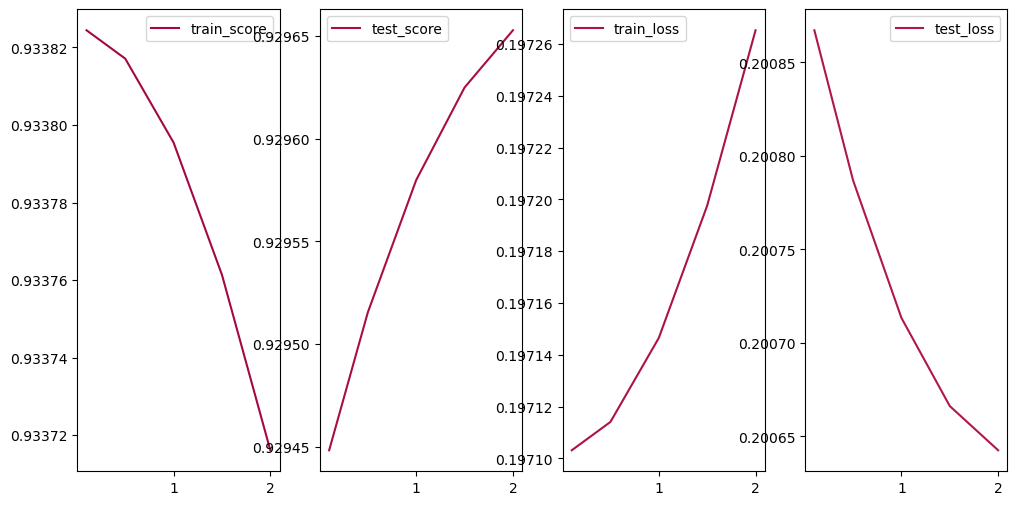

In [67]:
fig, axe = plt.subplots(1,4, figsize=(12,6), sharex=True)
axe = axe.flatten()
cmap = plt.cm.Spectral
colors = [cmap(x) for x in range(3, 12, 2)]
for ax, col, color1 in zip(axe, resultDF.columns[1:], colors):
    ax.plot(resultDF['alpha'], resultDF[col], color = color1, label=col)
    ax.legend()
    